<a href="https://colab.research.google.com/github/tingtingting118/MLCupKaggleEvent/blob/main/ML_cup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats


#modeling


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import IsolationForest

# for feature engineering
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce
from sklearn.preprocessing import OneHotEncoder
from tempfile import mkdtemp
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder
from feature_engine.outliers import ArbitraryOutlierCapper
import scipy.stats as stats

import feature_engine.transformation as vt


from datetime import datetime as dt
from feature_engine.outliers import Winsorizer

In [ ]:
url_train = 'https://raw.githubusercontent.com/tingtingting118/MLCupKaggleEvent/main/diabetes_train.csv'
data = pd.read_csv(url_train)
#url_y = 'https://raw.githubusercontent.com/tingtingting118/PumpitUp/main/Train_Y.csv'
#data_y = pd.read_csv(url_y)
url_test = 'https://raw.githubusercontent.com/tingtingting118/MLCupKaggleEvent/main/diabetes_test.csv'
X_testing = pd.read_csv(url_test)
#data_test = pd.read_csv(url_test_x)

In [ ]:
data.head()

,Id,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age,diabetes
0,358,13,129,0,30,0,39.9,0.569,44,1
1,74,4,129,86,20,270,35.1,0.231,23,0
2,353,3,61,82,28,0,34.4,0.243,46,0
3,498,2,81,72,15,76,30.1,0.547,25,0
4,146,0,102,75,23,0,0.0,0.572,21,0


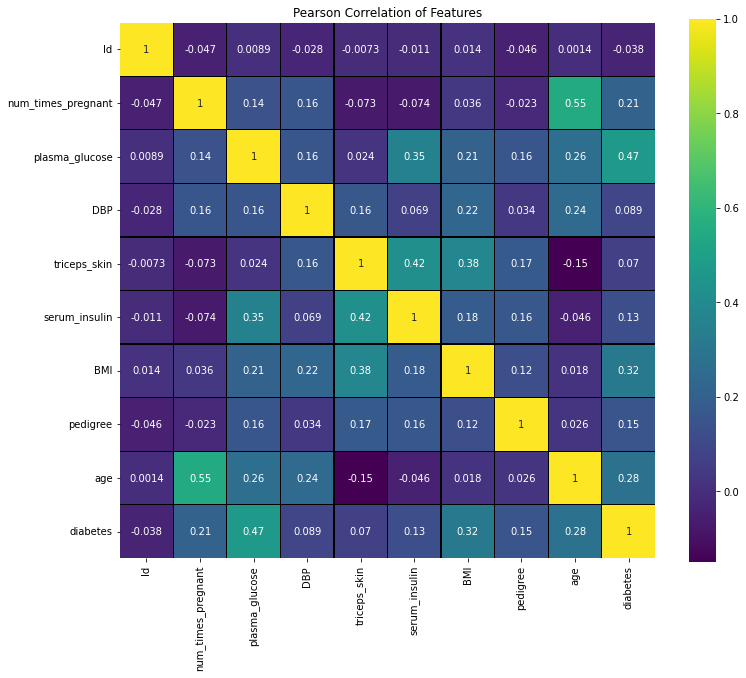

In [ ]:
#check correlation between features
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Features')

# Draw the heatmap using seaborn

sns.heatmap(data.corr(),linewidths=0.25, square=True, cmap =plt.cm.viridis, linecolor='black', annot=True)
plt.show()

In [ ]:
#drop columns 
df_x = data.drop(columns = ["Id","diabetes"])
df_y = data["diabetes"]

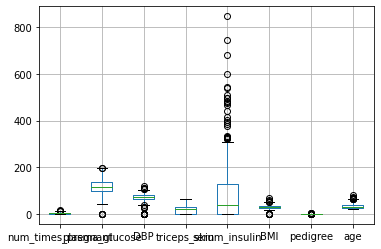

In [ ]:
boxplot = df_x.boxplot(column=list(df_x.columns))

In [ ]:
IQR_Outliers(df_x,features)

# of features:  8
Features:  ['num_times_pregnant', 'plasma_glucose', 'DBP', 'triceps_skin', 'serum_insulin', 'BMI', 'pedigree', 'age']
Number of samples:  576

Feature:  num_times_pregnant
Upper and Lower limits:  13.5 -6.5
Number of outliers:  4
Outliers Index:  [145, 235, 433, 496]
Outliers:  [15 14 17 14]

Feature:  plasma_glucose
Upper and Lower limits:  197.125 40.125
Number of outliers:  7
Outliers Index:  [59, 114, 137, 178, 461, 509, 557]
Outliers:  [  0   0   0   0   0 198 199]

Feature:  DBP
Upper and Lower limits:  104.0 40.0
Number of outliers:  31
Outliers Index:  [0, 33, 34, 43, 47, 55, 78, 91, 100, 106, 113, 115, 116, 130, 131, 148, 155, 163, 181, 219, 245, 254, 345, 390, 391, 422, 427, 498, 530, 572, 574]
Outliers:  [  0   0   0  30   0  38   0 110 110   0   0   0   0   0   0  30 106   0
   0   0   0   0  24   0   0   0 106   0   0 122   0]

Feature:  triceps_skin
Upper and Lower limits:  80.0 -48.0
Number of outliers:  0
Outliers Index:  []
Outliers:  []

Feature:  se

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
pipe = Pipeline([
# ('Outlier_removal', 

# Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
#                           tail='both', # cap left, right or both tails 
#                           fold=1.5,
#                           variables=['num_times_pregnant', 'plasma_glucose', 'plasma_glucose','DBP','age','pedigree','serum_insulin','BMI'])),
('mean_imputer', MeanMedianImputer(imputation_method='mean',
                                       variables=['DBP','serum_insulin','triceps_skin','plasma_glucose','BMI'])),                 

('logarithm_transform', vt.LogCpTransformer(variables = ['serum_insulin','pedigree','age','num_times_pregnant'],C="auto")),

 ('standardizer', StandardScaler()),
       ('model', LogisticRegression())
 
 
 ])                


In [ ]:
pipe.fit(df_x, df_y)

Pipeline(steps=[('Outlier_removal',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['num_times_pregnant', 'plasma_glucose',
                                       'plasma_glucose', 'DBP', 'age',
                                       'pedigree', 'serum_insulin', 'BMI'])),
                ('logarithm_transform',
                 LogCpTransformer(variables=['serum_insulin', 'pedigree', 'age',
                                             'num_times_pregnant'])),
                ('standardizer', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=3))])

In [ ]:
pipe.fit(X,y)

Pipeline(steps=[('mean_imputer',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['DBP', 'serum_insulin',
                                              'triceps_skin', 'plasma_glucose',
                                              'BMI'])),
                ('logarithm_transform',
                 LogCpTransformer(variables=['serum_insulin', 'pedigree', 'age',
                                             'num_times_pregnant'])),
                ('standardizer', StandardScaler()),
                ('model', LogisticRegression())])

In [ ]:
rfc_y_predict = pipe.predict(X_testing.drop(columns = ["Id"]))

In [ ]:
print(cross_val_score(pipe, X,y, cv=5,scoring="f1_weighted").mean(),
cross_val_score(pipe, X,y, cv=5,scoring="f1_macro").mean())

0.7664973733652671 0.7363775775870501


In [ ]:
print(cross_val_score(pipe, df_x, df_y, cv=5,scoring="f1_weighted").mean(),
cross_val_score(pipe, df_x, df_y, cv=5,scoring="f1_macro").mean())

In [ ]:
print(cross_val_score(pipe, df_x, df_y, cv=5,scoring="f1_weighted").mean(),
cross_val_score(pipe, df_x, df_y, cv=5,scoring="f1_macro").mean())

0.7780563131090311 0.7486604260507695


In [ ]:
rfc_submission = pd.DataFrame({"Id":X_testing["Id"], "Predicted":rfc_y_predict})
rfc_submission.to_csv("logistic.csv",index= False)#

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import svm

In [ ]:
pipe2 = Pipeline([
('Outlier_removal', 

Winsorizer(capping_method='gaussian', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['num_times_pregnant', 'plasma_glucose', 'plasma_glucose','DBP','age','pedigree','serum_insulin','BMI'])),
 ('logarithm_transform', vt.LogCpTransformer(variables = ['serum_insulin','pedigree','age','num_times_pregnant'],C="auto")),
 
     
('rfmodel',RandomForestClassifier())
       
 
 
 ])    

In [ ]:
pipe2.fit(df_x, df_y)
xgboost_y_predict = pipe2.predict(X_testing.drop(columns = ["Id"]))

In [ ]:
print(cross_val_score(pipe2, df_x, df_y, cv=5,scoring="f1_weighted").mean(),
cross_val_score(pipe2, df_x, df_y, cv=5,scoring="f1_macro").mean())

0.7661100748995082 0.7229698472339493


In [ ]:
xg_submission = pd.DataFrame({"Id":X_testing["Id"], "Predicted":xgboost_y_predict})
xg_submission.to_csv("gnb_submission_1207.csv",index= False)#

In [ ]:
df_x.columns

Index(['num_times_pregnant', 'plasma_glucose', 'DBP', 'triceps_skin',
       'serum_insulin', 'BMI', 'pedigree', 'age'],
      dtype='object')

In [ ]:
pipe3 = Pipeline([
('Outlier_removal', 

Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['num_times_pregnant', 'plasma_glucose', 'plasma_glucose','DBP','age','pedigree','serum_insulin','BMI'])),
 ('logarithm_transform', vt.LogCpTransformer(variables = ['serum_insulin','pedigree','age','num_times_pregnant'],C="auto")),
 
     
('clf',GradientBoostingClassifier())
       
 
 
 ])  

In [ ]:
pipe3.fit(df_x, df_y)
xgboost_y_predict2 = pipe3.predict(X_testing.drop(columns = ["Id"]))

In [ ]:
print(cross_val_score(pipe3, df_x, df_y, cv=5,scoring="f1_weighted").mean(),
cross_val_score(pipe3, df_x, df_y, cv=5,scoring="f1_macro").mean())

0.7665291816351585 0.7328574905892835


In [ ]:
xg_submission2 = pd.DataFrame({"Id":X_testing["Id"], "Predicted":xgboost_y_predict2})
xg_submission2.to_csv("xg_submission2_1207.csv",index= False)#

In [ ]:
X = df_x.copy()
y = df_y.copy()

In [ ]:
X.loc[X["BMI"]<18,"BMI"] = np.NaN
#.replace(0,np.NaN,inplace = True)




In [ ]:
X.loc[X["triceps_skin"]==0,"triceps_skin"] = np.NaN

In [ ]:
X.loc[X["serum_insulin"]==0,"serum_insulin"] = np.NaN

In [ ]:
X.loc[X["plasma_glucose"]==0,"plasma_glucose"] = np.NaN

In [ ]:
X.loc[X["DBP"]==0,"DBP"] = np.NaN

In [ ]:
X.isnull().mean()


num_times_pregnant    0.000000
plasma_glucose        0.008681
DBP                   0.038194
triceps_skin          0.284722
serum_insulin         0.479167
BMI                   0.010417
pedigree              0.000000
age                   0.000000
dtype: float64

In [ ]:
from feature_engine.imputation import MeanMedianImputer


In [ ]:
pipe4 = Pipeline([
 ('mean_imputer', MeanMedianImputer(imputation_method='median',
                                       variables=['DBP','serum_insulin','triceps_skin','plasma_glucose','BMI'])),
 ('logarithm_transform', vt.LogCpTransformer(variables = ['serum_insulin','pedigree','age','num_times_pregnant'],C="auto")),
 
     
('clf',GradientBoostingClassifier())
       
 
 
 ])  

In [ ]:
pipe4.fit(X, y)
y_predict = pipe4.predict(X_testing.drop(columns = ["Id"]))

In [ ]:
print(cross_val_score(pipe4, X, y, cv=5,scoring="f1_weighted").mean(),
cross_val_score(pipe4, X, y, cv=5,scoring="f1_macro").mean())

0.7635476109747465 0.7349242216136248


In [ ]:
print(cross_val_score(pipe4, X, y, cv=5,scoring="f1_weighted").mean(),
cross_val_score(pipe4, X, y, cv=5,scoring="f1_macro").mean())

0.7581961953432483 0.7289281166519018


In [ ]:
submission = pd.DataFrame({"Id":X_testing["Id"], "Predicted":y_predict})
submission.to_csv("submission.csv",index= False)#